Creating GIF for class 0, epoch 10...
GIF saved for class 0, epoch 10: D:\DDPM-diffusion\GIFs\diffusion_process_class_0_epoch_10.gif (interval 20 ms, fps 50)


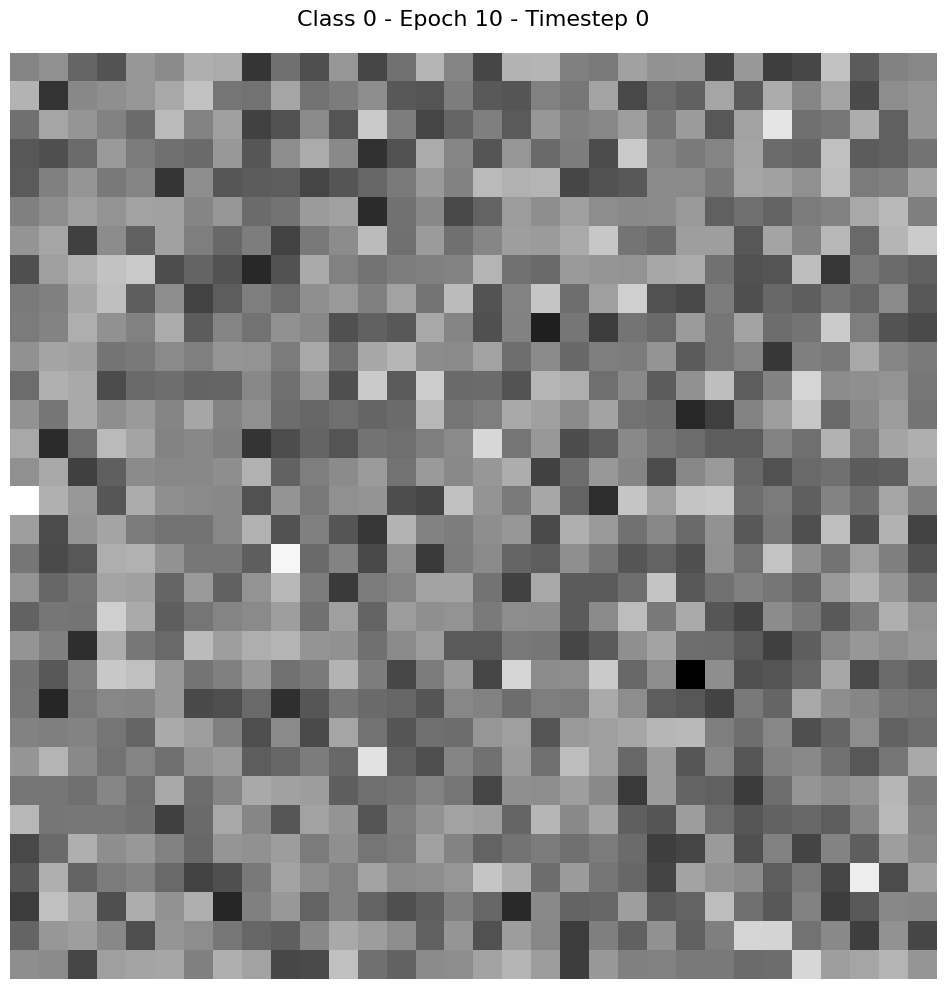

GIF successfully created and saved to: D:\DDPM-diffusion\GIFs


In [ ]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np

results_path = fr"D:\DDPM-diffusion\results"
gifs_dir = r"D:\DDPM-diffusion\GIFs"

"""
results have been saved to the results path. 
the file format is sampled_epoch{epoch}_batch{batch_index}_timestep{timestep_idx}_class{class_idx}.png
"""

def create_gif_for_class(class_idx, epoch, batch_index=0, play_reverse=True, interval_ms=20):
    """Create a GIF showing the diffusion process for a specific class and epoch.
       play_reverse=True will play the frames in reverse order.
       interval_ms: delay between frames in milliseconds
    """
    
    pattern = f"sampled_epoch{epoch}_batch{batch_index}_timestep*_class{class_idx}.png"
    image_files = glob.glob(os.path.join(results_path, pattern))
    
    if not image_files:
        print(f"No images found for class {class_idx}, epoch {epoch}, batch {batch_index}")
        return None
    
    timestep_files = []
    for file in image_files:
        filename = os.path.basename(file)
        parts = filename.split('_')
        for part in parts:
            if part.startswith('timestep'):
                timestep = int(part.replace('timestep', '').replace('.png', ''))
                timestep_files.append((timestep, file))
                break
    
    timestep_files.sort(key=lambda x: x[0])
    
    if not timestep_files:
        print(f"No valid timestep files found for class {class_idx}, epoch {epoch}")
        return None
    
    images = []
    timesteps = []
    for timestep, file_path in timestep_files:
        img = Image.open(file_path).convert("RGB")
        images.append(np.array(img))
        timesteps.append(timestep)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    
    im = ax.imshow(images[0], animated=True)
    title = ax.set_title(f'Class {class_idx} - Epoch {epoch} - Timestep {timesteps[0]}', fontsize=16, pad=20)
    
    def animate(frame_idx):
        im.set_array(images[frame_idx])
        title.set_text(f'Class {class_idx} - Epoch {epoch} - Timestep {timesteps[frame_idx]}')
        return [im, title]
    
    fps = max(1, int(1000 / interval_ms))
    
    if play_reverse:
        frames_seq = range(len(images) - 1, -1, -1)
    else:
        frames_seq = range(len(images))
    
    # Create animation
    anim = animation.FuncAnimation(fig, animate, frames=frames_seq, 
                                   interval=interval_ms, blit=True, repeat=True)
    os.makedirs(gifs_dir, exist_ok=True)
    gif_path = os.path.join(gifs_dir, f'diffusion_process_class_{class_idx}_epoch_{epoch}.gif')
    anim.save(gif_path, writer='pillow', fps=fps, dpi=100)
    
    print(f"GIF saved for class {class_idx}, epoch {epoch}: {gif_path} (interval {interval_ms} ms, fps {fps})")
    
    plt.tight_layout()
    plt.show()
    
    return anim

# Configuration parameters
TARGET_EPOCH = 10  # Change this to desired epoch
TARGET_CLASS = 0   # Change this to desired class (0-9)

print(f"Creating GIF for class {TARGET_CLASS}, epoch {TARGET_EPOCH}...")
anim = create_gif_for_class(TARGET_CLASS, TARGET_EPOCH, play_reverse=False,interval_ms=5)
if anim:
    print(f"GIF successfully created and saved to: {gifs_dir}")
else:
    print(f"Failed to create GIF for class {TARGET_CLASS}, epoch {TARGET_EPOCH}")